## Dataset: Wisconsin Diagnostic breast cancer (Classification Problem) 

## Model Training

In [1]:
# import the pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to show all the columns of the dataframe in the notebeook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.model_selection import (
    RepeatedStratifiedKFold, 
    cross_validate)

from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix,
    auc,
    roc_curve)

from feature_engine.encoding import OrdinalEncoder

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier

## Step 1: Data Transformation

### Preparing X and Y variables

In [2]:
from sklearn.datasets import load_breast_cancer

df_bc = load_breast_cancer() 
df_bc.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [3]:
data = np.c_[df_bc.data, df_bc.target]
column_names = np.append(df_bc.feature_names, ['malignant'])
df = pd.DataFrame(data, columns=column_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [4]:
df.columns = df.columns.str.replace(' ', '_')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [5]:
df['malignant'].value_counts()

malignant
1.0    357
0.0    212
Name: count, dtype: int64

In [6]:
df['malignant'] = df['malignant'].map(lambda x: 1 if x != 1.0 else 0)
df['malignant'].value_counts()

malignant
0    357
1    212
Name: count, dtype: int64

In [7]:
df.to_csv("./processed_data/cancer.csv", index = False)

In [8]:
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

In [9]:
X = df.drop(columns=['malignant'],axis=1)
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
X.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')

In [11]:
X.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
y = df['malignant']

In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: malignant, Length: 569, dtype: int64

In [14]:
train_idx, test_idx = next(strat_shuff_split.split(X, y))

In [15]:
train_set = df.loc[train_idx]  
train_set

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,malignant
78,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,0.08142,0.9317,1.8850,8.649,116.40,0.010380,0.068350,0.109100,0.025930,0.07895,0.005987,23.37,31.72,170.30,1623.0,0.16390,0.61640,0.76810,0.25080,0.5440,0.09964,1
330,16.03,15.51,105.80,793.2,0.09491,0.13710,0.12040,0.07041,0.1782,0.05976,0.3371,0.7476,2.629,33.27,0.005839,0.032450,0.037150,0.014590,0.01467,0.003121,18.76,21.98,124.30,1070.0,0.14350,0.44780,0.49560,0.19810,0.3019,0.09124,1
378,13.66,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,0.05897,0.1402,0.5417,1.101,11.35,0.005212,0.029840,0.024430,0.008356,0.01818,0.004868,14.54,19.64,97.96,657.0,0.12750,0.31040,0.25690,0.10540,0.3387,0.09638,0
213,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,0.5296,1.6670,3.767,58.53,0.031130,0.085550,0.143800,0.039270,0.02175,0.012560,18.07,28.07,120.40,1021.0,0.12430,0.17930,0.28030,0.10990,0.1603,0.06818,1
89,14.64,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,0.06346,0.5115,0.7372,3.814,42.76,0.005508,0.044120,0.044360,0.016230,0.02427,0.004841,16.34,18.24,109.40,803.6,0.12770,0.30890,0.26040,0.13970,0.3151,0.08473,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,0.1839,2.3420,1.170,14.16,0.004352,0.004899,0.013430,0.011640,0.02671,0.001777,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
415,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,0.2019,0.06290,0.2747,1.2030,1.930,19.53,0.009895,0.030530,0.016300,0.009276,0.02258,0.002272,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351,0
458,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,0.2621,1.2320,1.657,21.19,0.006054,0.008974,0.005681,0.006336,0.01215,0.001514,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291,0
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,0.3478,1.0180,2.749,31.01,0.004107,0.032880,0.028210,0.013500,0.01610,0.002744,16.45,27.26,112.10,828.5,0.11530,0.34290,0.25120,0.13390,0.2534,0.07858,0


In [16]:
test_set = df.loc[test_idx]
test_set

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,malignant
448,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.029250,0.1473,0.05746,0.2535,1.3540,1.994,23.04,0.004147,0.020480,0.033790,0.008848,0.01394,0.002327,16.300,28.39,108.10,830.5,0.10890,0.26490,0.37790,0.09594,0.2471,0.07463,0
346,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,0.1555,0.06048,0.2430,1.1520,1.559,18.02,0.007180,0.010960,0.005832,0.005495,0.01982,0.002754,13.640,27.06,86.54,562.6,0.12890,0.13520,0.04506,0.05093,0.2880,0.08083,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.000000,0.1587,0.05884,0.3857,1.4280,2.548,19.15,0.007189,0.004660,0.000000,0.000000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039,0
411,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.024800,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.010560,0.007483,0.01718,0.002198,12.410,26.44,79.93,471.4,0.13690,0.14820,0.10670,0.07431,0.2998,0.07881,0
519,12.75,16.70,82.51,493.8,0.11250,0.11170,0.03880,0.029950,0.2120,0.06623,0.3834,1.0030,2.495,28.62,0.007509,0.015610,0.019770,0.009199,0.01805,0.003629,14.450,21.74,93.63,624.1,0.14750,0.19790,0.14230,0.08045,0.3071,0.08557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,12.31,16.52,79.19,470.9,0.09172,0.06829,0.03372,0.022720,0.1720,0.05914,0.2505,1.0250,1.740,19.68,0.004854,0.018190,0.018260,0.007965,0.01386,0.002304,14.110,23.21,89.71,611.1,0.11760,0.18430,0.17030,0.08660,0.2618,0.07609,0
39,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.054390,0.1720,0.06419,0.2130,0.5914,1.545,18.52,0.005367,0.022390,0.030490,0.012620,0.01377,0.003187,15.530,26.02,107.30,740.4,0.16100,0.42250,0.50300,0.22580,0.2807,0.10710,1
99,14.42,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.058390,0.1879,0.06390,0.2895,1.8510,2.376,26.85,0.008005,0.028950,0.033210,0.014240,0.01462,0.004452,16.330,30.86,109.50,826.4,0.14310,0.30260,0.31940,0.15650,0.2718,0.09353,1
115,11.93,21.53,76.53,438.6,0.09768,0.07849,0.03328,0.020080,0.1688,0.06194,0.3118,0.9227,2.000,24.79,0.007803,0.025070,0.018350,0.007711,0.01278,0.003856,13.670,26.15,87.54,583.0,0.15000,0.23990,0.15030,0.07247,0.2438,0.08541,0


In [17]:
target_column_name="malignant"

input_feature_train_df=train_set.drop(columns=[target_column_name],axis=1)
target_feature_train_df=train_set[target_column_name]

In [18]:
input_feature_test_df=test_set.drop(columns=[target_column_name],axis=1)
target_feature_test_df=test_set[target_column_name]

In [19]:
# Create Column Transformer with 3 types of transformers
numerical_columns = X.select_dtypes(exclude="object").columns
categorical_columns = X.select_dtypes(include="object").columns

num_pipeline= Pipeline(
                steps=[ 
                        ("scaler",StandardScaler())
                      ]
                    )
                                    
preprocessor=ColumnTransformer(
                [
                    ("num_pipeline",num_pipeline,numerical_columns),
                ]
                            )

In [20]:
input_feature_train_arr=preprocessor.fit_transform(input_feature_train_df)
input_feature_test_arr=preprocessor.transform(input_feature_test_df)

## Step 2: Machine Learning Modelling  <a id="part9"></a>

### Train and Test Split  <a id="part9.1"></a>

In [21]:
# separate dataset into train and test

train_arr = np.c_[input_feature_train_arr, np.array(target_feature_train_df)]

test_arr = np.c_[input_feature_test_arr, np.array(target_feature_test_df)]

X_train,y_train,X_test,y_test=(
                train_arr[:,:-1],
                train_arr[:,-1],
                test_arr[:,:-1],
                test_arr[:,-1]
            )

In [22]:
X_train

array([[ 1.70581999,  1.04974466,  2.12129465, ...,  2.04939907,
         3.94428119,  0.86655367],
       [ 0.53638811, -0.90994477,  0.5690952 , ...,  1.25584994,
         0.16797759,  0.40524244],
       [-0.13145612, -0.99333581, -0.14884823, ..., -0.14001353,
         0.74198821,  0.68752098],
       ...,
       [-0.31743806,  1.31844912, -0.38065427, ..., -0.835536  ,
        -0.944168  , -1.15058462],
       [ 0.02071092,  0.25289695,  0.02070601, ...,  0.28913543,
        -0.58853098, -0.2900195 ],
       [ 1.59592158,  1.3161327 ,  1.57659141, ...,  0.88090926,
         0.61408367,  0.04333279]])

In [23]:
y_train

array([1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 0.

### Model evaluation functions

In [24]:
def evaluate_model_kfolds(cv):
    model = list(models.values())[i]
    
    model.fit(X_train, y_train)
    
    #create an serach and evaluation ranges for depth and features
    para=params[list(models.keys())[i]]
    
    gs = GridSearchCV(model,para, n_jobs = -1, scoring = 'roc_auc')
    
    gs.fit(X_train, y_train)
    
    # evaluate the model
    scores = cross_validate(gs, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
    # return scores
    return scores['test_roc_auc'].mean()

In [25]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [26]:
def display_confusion_matrix(y_test, y_test_pred):
    cm = confusion_matrix(y_test, y_test_pred)         
    plt.title('Confusion Matrix (Test Data)')
    sns.heatmap(cm, annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')        
    plt.show()

In [27]:
def display_roc_curve(y_test, y_test_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    auc_ = auc(fpr, tpr)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Classifier (area = {:.3f})'.format(auc_))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

### Model Training with RepeatedStratifiedKFold Cross-Validation

In [28]:
models = {
            "k-NN": KNeighborsClassifier(),
            "Decision Tree": DecisionTreeClassifier(random_state=42),
            "SVM": svm.SVC(),
            "BernoulliNB": BernoulliNB(),
            "LogisticRegression": LogisticRegression(random_state=42),
            "HistGradientBoostingClassifier": HistGradientBoostingClassifier(),
            "XGBClassifier": XGBClassifier(),
            "GradientBoostClassifier": GradientBoostingClassifier()
    
         }


params={
            "k-NN": {"n_neighbors": [10, 20, 30 , 40]},
            
            "Decision Tree":{
                'max_depth': [1, 3, 5, 7],
                'max_features': [1, 10, 20 , 30]
                            },
            
            "SVM":{  
                'kernel': ('linear', 'poly', 'rbf'),
                'C': [0.01, 0.1, 1, 10]},
    
            "BernoulliNB":{},
    
            "LogisticRegression":{
                'solver': ['lbfgs', 'liblinear', 'newton-cholesky'],
                'C': [0.01, 0.1, 1, 10],
                'max_iter': [100, 1000, 10000]
                                 },
            
            "HistGradientBoostingClassifier":{
            'learning_rate':[.1,.01,.05,.001],
            'max_depth': [6,8,10]
                },
     
            "XGBClassifier":{
            'learning_rate':[.1,.01,.001],
            'n_estimators': [8,16,32,64,128]
                            },
     
            "GradientBoostClassifier":{
            'learning_rate':[.1,.01,.05,.001],
            'subsample':[0.6,0.7,0.8,0.9],
            'n_estimators': [8,16,32,64,128]
                                }
        }

# define folds to test
folds = range(5,11)

# record each set of results
k_fold_list = []
model_list = []
params_list = []
f1_list = []
recall_list = []
precision_list = []
accuracy_list = []

for i in range(len(list(models))):
    # evaluate each k value
    for k in folds:
        # define the test condition
        cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=1, random_state=0)
        # evaluate k value
        k_mean = evaluate_model_kfolds(cv)
        # report performance
        print('k-folds=%d' % (k))
        print(k_mean)
        print()
        # store each mean roc_auc into the list
        k_fold_list.append(k_mean)
        
    model = list(models.values())[i]
    para=params[list(models.keys())[i]]
    gs = GridSearchCV(model,para, n_jobs = -1, scoring = 'roc_auc')
    gs.fit(X_train, y_train)
    cv = RepeatedStratifiedKFold(n_splits= max(range(len(k_fold_list)), key=k_fold_list.__getitem__) + 2, n_repeats=1, random_state=0)
    scores = cross_validate(gs, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
    params_list.append(gs.best_params_)
    model.set_params(**gs.best_params_)
    model.fit(X_train, y_train) # Train model
        
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(list(models.keys())[i])
    print(len(list(models.keys())[i]) * '-')

    print('Model performance')
    train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                       measure_error(y_test, y_test_pred, 'test')],
                                       axis=1)
    display(train_test_full_error)
    model_list.append(list(models.keys())[i])

    accuracy_list.append(train_test_full_error['test'].values[0])
    precision_list.append(train_test_full_error['test'].values[1])
    recall_list.append(train_test_full_error['test'].values[2])
    f1_list.append(train_test_full_error['test'].values[3])

    print('='*35)
    print('\n')
        

k-folds=5
0.9882022988505748

k-folds=6
0.9867284488321074

k-folds=7
0.9872323821303413

k-folds=8
0.9859208094581211

k-folds=9
0.9869370201784418

k-folds=10
0.986552380952381

k-NN
----
Model performance


,train,test
accuracy,0.964824,0.953216
precision,0.985507,0.982759
recall,0.918919,0.890625
f1,0.951049,0.934426




k-folds=5
0.9252137931034483

k-folds=6
0.9259662537101562

k-folds=7
0.9220003730207811

k-folds=8
0.9349643640350878

k-folds=9
0.9391726212089774

k-folds=10
0.9238952380952382

Decision Tree
-------------
Model performance


,train,test
accuracy,0.994975,0.953216
precision,1.000000,1.000000
recall,0.986486,0.875000
f1,0.993197,0.933333




k-folds=5
0.9861609195402299

k-folds=6
0.9930024841915085

k-folds=7
0.9939070000294491

k-folds=8
0.9904292822109035

k-folds=9
0.9889819353667393

k-folds=10
0.9920952380952383

SVM
---
Model performance


,train,test
accuracy,0.989950,0.970760
precision,1.000000,0.983607
recall,0.972973,0.937500
f1,0.986301,0.960000




k-folds=5
0.9779264367816092

k-folds=6
0.9786348238482385

k-folds=7
0.9773453681616947

k-folds=8
0.9761763700245236

k-folds=9
0.9806990697513575

k-folds=10
0.9761714285714286

BernoulliNB
-----------
Model performance


,train,test
accuracy,0.937186,0.947368
precision,0.901961,0.950820
recall,0.932432,0.906250
f1,0.916944,0.928000




k-folds=5
0.9916413793103448

k-folds=6
0.994971125306491

k-folds=7
0.9946780732495019

k-folds=8
0.9921981848943595

k-folds=9
0.9943399427672303

k-folds=10
0.9942857142857143

LogisticRegression
------------------
Model performance


,train,test
accuracy,0.979899,0.988304
precision,0.986111,1.000000
recall,0.959459,0.968750
f1,0.972603,0.984127




k-folds=5
0.9891540229885057

k-folds=6
0.9930216802168021

k-folds=7
0.9901075870463626

k-folds=8
0.9899838326495001

k-folds=9
0.9920813232700488

k-folds=10
0.9917714285714286

HistGradientBoostingClassifier
------------------------------
Model performance


,train,test
accuracy,1.0,0.953216
precision,1.0,1.000000
recall,1.0,0.875000
f1,1.0,0.933333




k-folds=5
0.9879080459770115

k-folds=6
0.9926469544457349

k-folds=7
0.9912457912457912

k-folds=8
0.9896964458356914

k-folds=9
0.9917384777985269

k-folds=10
0.9923428571428572

XGBClassifier
-------------
Model performance


,train,test
accuracy,1.0,0.988304
precision,1.0,1.000000
recall,1.0,0.968750
f1,1.0,0.984127




k-folds=5
0.9877655172413793

k-folds=6
0.9905258743063622

k-folds=7
0.9881722963355617

k-folds=8
0.9901253153886058

k-folds=9
0.9913372756510012

k-folds=10
0.9904380952380952

GradientBoostClassifier
-----------------------
Model performance


,train,test
accuracy,1.0,0.964912
precision,1.0,1.000000
recall,1.0,0.906250
f1,1.0,0.950820


### Results

In [29]:
df_results = pd.DataFrame(list(zip(model_list, f1_list,  recall_list, precision_list, accuracy_list, params_list)), columns=['Model Name', 'F1_Score', 'Recall_Score', 'Precision_Score', 'Accuracy_Score', 'Best_Params']).sort_values(by=["F1_Score"],ascending=False).reset_index(drop=True)
df_results.index += 1
df_results

,Model Name,F1_Score,Recall_Score,Precision_Score,Accuracy_Score,Best_Params
1,LogisticRegression,0.984127,0.968750,1.000000,0.988304,"{'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}"
2,XGBClassifier,0.984127,0.968750,1.000000,0.988304,"{'learning_rate': 0.1, 'n_estimators': 128}"
3,SVM,0.960000,0.937500,0.983607,0.970760,"{'C': 10, 'kernel': 'rbf'}"
4,GradientBoostClassifier,0.950820,0.906250,1.000000,0.964912,"{'learning_rate': 0.1, 'n_estimators': 128, 'subsample': 0.6}"
5,k-NN,0.934426,0.890625,0.982759,0.953216,{'n_neighbors': 10}
6,Decision Tree,0.933333,0.875000,1.000000,0.953216,"{'max_depth': 7, 'max_features': 10}"
7,HistGradientBoostingClassifier,0.933333,0.875000,1.000000,0.953216,"{'learning_rate': 0.1, 'max_depth': 8}"
8,BernoulliNB,0.928000,0.906250,0.950820,0.947368,{}


## Step 3: Predictions

### Logistic Regression  <a id="part9.6"></a>

### Confusion Matrix

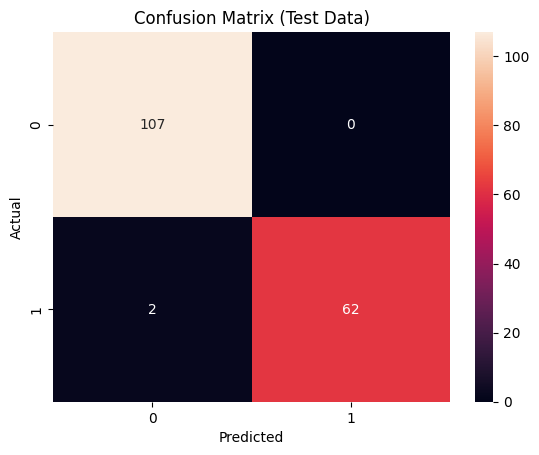

In [30]:
LogR_model = LogisticRegression(C= 0.1, max_iter= 100, solver='liblinear')
LogR_model = LogR_model.fit(X_train, y_train)

y_test_pred = LogR_model.predict(X_test)

display_confusion_matrix(y_test, y_test_pred)

### ROC Curve

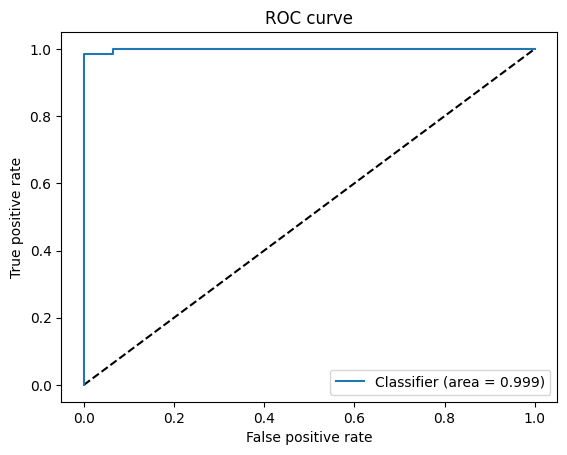

In [31]:
LogR_model = LogisticRegression(C= 0.1, max_iter= 100, solver='liblinear')
LogR_model = LogR_model.fit(X_train, y_train)

y_test_pred = LogR_model.predict_proba(X_test)[:, 1]

display_roc_curve(y_test, y_test_pred)

## Summary of results
After optimization of all models, the best performing Classifiers that give the lowest False Positives and False Negatives are Logistic Regression and XGBClassifier. They have the highest F1 score of 0.984127 amongst others. 

## End of Notebook